# Paddy Leaf Detection Code

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras import optimizers

%matplotlib inline
from tensorflow.keras.layers import BatchNormalization


In [2]:
DATASET1="C:\\Users\\Mohini Tyagi\\Downloads\\paddy-disease-classification\\train_images"
DATASET2="C:\\Users\\Mohini Tyagi\\Downloads\\paddy-disease-classification\\test_images"

In [3]:
CATEGORIES=["BrownSpot","Healthy","Hispa","LeafBlast"]

In [4]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET1,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
            

In [5]:
test_data=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [6]:
print(len(train_data))
print(len(test_data))

6061
2597


In [7]:
# suffling to keep the data at random position to avoid underfitting and overfitting

import random

random.shuffle(train_data)
random.shuffle(test_data)
for lbl in train_data[:4]:
    print(lbl[1])
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)
    

3
1
0
3


In [8]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BROWN SPOT")
 
    elif i==1:
        Y.append("HEALTHY")
    elif i==2:
        Y.append("HISPA")
    else :
        Y.append("LEAF BLAST")


In [9]:
import pandas as pd
df1=pd.DataFrame(Y,columns=['Diseases'])
df1

,Diseases
0,LEAF BLAST
1,HEALTHY
2,BROWN SPOT
3,LEAF BLAST
4,LEAF BLAST
...,...
6056,HEALTHY
6057,LEAF BLAST
6058,HISPA
6059,HEALTHY


In [10]:
len(X_train),len(y_train)


(6061, 6061)

In [11]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [12]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BROWN SPOT")
 
    elif i==1:
        Z.append("HEALTHY")
    elif i==2:
        Z.append("HISPA")
    else :
        Z.append("LEAF BLAST")


In [13]:
df2=pd.DataFrame(Z,columns=['Diseases'])
df2

,Diseases
0,HEALTHY
1,HEALTHY
2,HEALTHY
3,BROWN SPOT
4,HISPA
...,...
2592,LEAF BLAST
2593,LEAF BLAST
2594,HEALTHY
2595,LEAF BLAST


In [14]:
len(X_test),len(y_test)


(2597, 2597)

In [15]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape


(2597, 64, 64, 3)

In [16]:
order=['BROWN SPOT',"HEALTHY","HISPA" ,'LEAF BLAST']

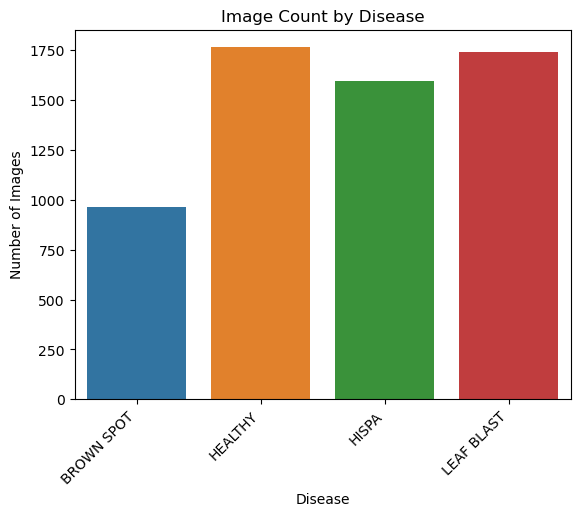

In [17]:
sns.countplot(x="Diseases", data=df1,order=order)
plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=45,ha='right')
plt.show()

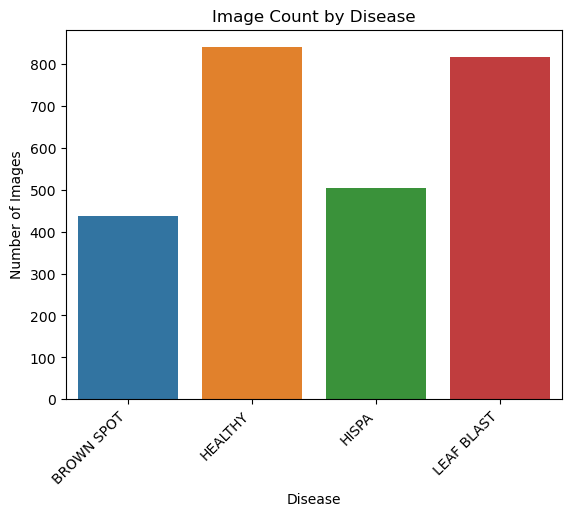

In [18]:
sns.countplot(x="Diseases", data=df2,order=order)
plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=45,ha='right')
plt.show()


In [19]:
# import keras
# from keras.utils import to_categorical

# from keras.models import Sequential

# from keras.layers import  Conv2D,Dense,Flatten,MaxPooling2D,Dropout, Activation

# from keras.layers.normalization import BatchNormalization

# import numpy as np

# image_shape=(227,222,3)

# np.random.seed(1000)
# one_hot_train=to_categorical(y_train)
# one_hot_test=to_categorical(y_test)

# classifier=Sequential()

# classifier.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding="valid"))
# classifier.add(Activation("relu"))

# classifier.add(MaxPooling2D(pool_size=(3,3),strides=(1,1),padding="valid"))

# classifier.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid"))
# classifier.add(Activation("relu"))

# classifier.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))

# classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
# classifier.add(Activation("relu"))
# classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
# classifier.add(Activation("relu"))
# classifier.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid"))
# classifier.add(Activation("relu"))

# classifier.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))

# classifier.add(flatten())
# classifier.add(Dense(4096, input_shape=(227*227*3,)))
# classifier.add(Activation("relu"))

# classifier.add(Dropout(0.4))

# classifier.add(Dense(4096))
# classifier.add(Activation("relu")
               
# classifier.add(Dropout(0.4))

# classifier.add(Dense(1000))
# classifier.add(Activation("softmax")
# model.summary()

# classifier.compile(optimizer='adam', loss=losees.categorical_crossentropy, metrics=['accuracy'])






In [20]:


from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

one_hot_train=to_categorical(y_train)
# one_hot_train

one_hot_test=to_categorical(y_test)
# one_hot_test

classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=4))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [21]:
hist=classifier.fit(X_train,one_hot_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 22s 535ms/step - loss: 1.3589 - accuracy: 0.2960 - val_loss: 1.3643 - val_accuracy: 0.2762
Epoch 2/10
38/38 [==============================] - 22s 576ms/step - loss: 1.2877 - accuracy: 0.3915 - val_loss: 1.2449 - val_accuracy: 0.4608
Epoch 3/10
38/38 [==============================] - 20s 535ms/step - loss: 1.1795 - accuracy: 0.4676 - val_loss: 1.1220 - val_accuracy: 0.5120
Epoch 4/10
38/38 [==============================] - 21s 548ms/step - loss: 1.0823 - accuracy: 0.5227 - val_loss: 1.0396 - val_accuracy: 0.5820
Epoch 5/10
38/38 [==============================] - 22s 592ms/step - loss: 0.9774 - accuracy: 0.6031 - val_loss: 0.8992 - val_accuracy: 0.6307
Epoch 6/10
38/38 [==============================] - 19s 507ms/step - loss: 0.8722 - accuracy: 0.6535 - val_loss: 0.7679 - val_accuracy: 0.7181
Epoch 7/10
38/38 [==============================] - 20s 540ms/step - loss: 0.7834 - accuracy: 0.6943 - val_loss: 0.7492 - val_accuracy: 0.7288

In [22]:
train_loss,train_acc=classifier.evaluate(X_train,one_hot_train)
train_loss,train_acc

190/190 [==============================] - 6s 30ms/step - loss: 0.4657 - accuracy: 0.8489


(0.46568763256073, 0.848869800567627)

In [23]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

82/82 [==============================] - 2s 29ms/step - loss: 0.4695 - accuracy: 0.8483


(0.4695355296134949, 0.848286509513855)

In [24]:
# #function to calculate accuracy
# from sklearn import metrics
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score
# #function to calculate accuracy
# def accuracy(model):
#   # accuracy score on the training data
#   X_train_prediction = model.predict(X_train)
#   training_data_accuracy = accuracy_score(X_train_prediction, y_train)
#   print('Accuracy score of the training data : ', training_data_accuracy)

#   # accuracy score on the test data
#   X_test_prediction = model.predict(X_test)
#   test_data_accuracy = accuracy_score(X_test_prediction, y_test)
#   print('Accuracy score of the test data : ', test_data_accuracy)  

# #function to calculate precision
# def precision(model):
#   # precision score on the training data
#   X_train_prediction = model.predict(X_train)
#   training_data_precision = precision_score(X_train_prediction, y_train)
#   print('\nPrecision of the training data : ', training_data_precision)

#   # precision score on the test data
#   X_test_prediction = model.predict(X_test)
#   test_data_precision = precision_score(X_test_prediction, y_test)
#   print('Precision of the test data : ', test_data_precision)

# #function to calculate recall
# def recall(model):
#   # recall score on the training data
#   X_train_prediction = model.predict(X_train)
#   training_data_recall = recall_score(X_train_prediction, y_train)
#   print('\nRecall of the training data : ', training_data_recall)

#   # recall score on the test data
#   X_test_prediction = model.predict(X_test)
#   test_data_recall = recall_score(X_test_prediction, y_test)
#   print('Recall of the test data : ', test_data_recall)

# #function to calculate f1_score
# def f1score(model):
#   # f1_score on the training data
#   X_train_prediction = model.predict(X_train)
#   training_data_f1_score = f1_score(X_train_prediction, y_train)
#   print('\nf1_score of the training data : ', training_data_f1_score)

#   # f1_score on the test data
#   X_test_prediction = model.predict(X_test)
#   test_data_f1_score = f1_score(X_test_prediction, y_test)
#   print('f1_score of the test data : ', test_data_f1_score)

In [25]:
# hist.predict(accuracy)

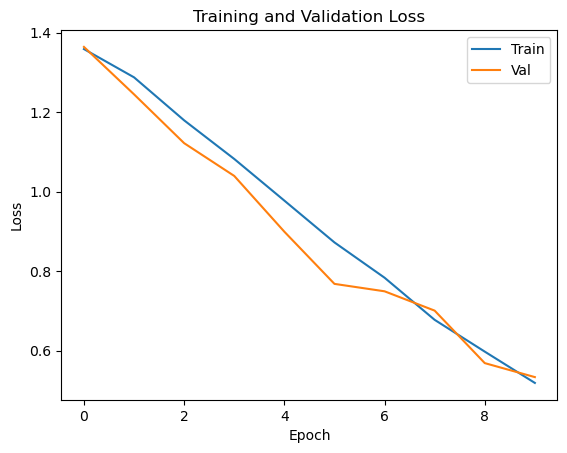

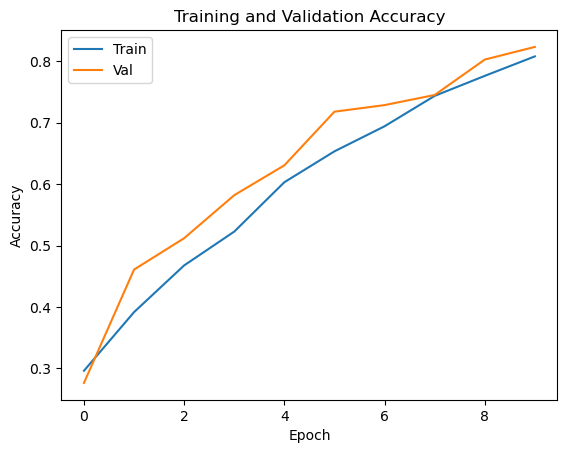

82/82 [==============================] - 2s 30ms/step


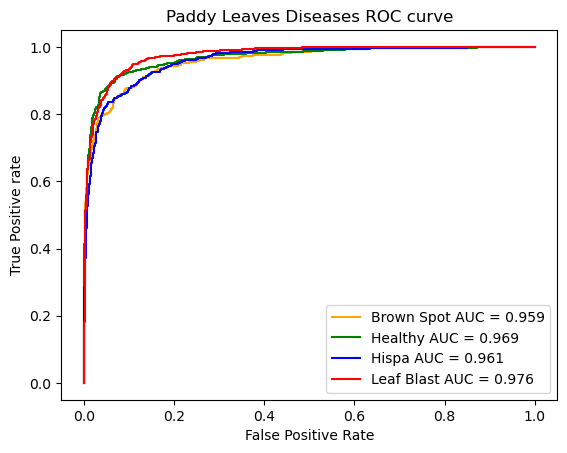

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# y_pred=classifier.predict_classes(X_test)
y_pred=np.argmax(classifier.predict(X_test), axis=-1)

# y_pred

# y_prob=classifier.predict_proba(X_test)
y_prob=classifier.predict(X_test)
# y_prob
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Brown Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Healthy AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Hispa AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Leaf Blast AUC = %0.3f' % roc_auc[3])

plt.title('Paddy Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

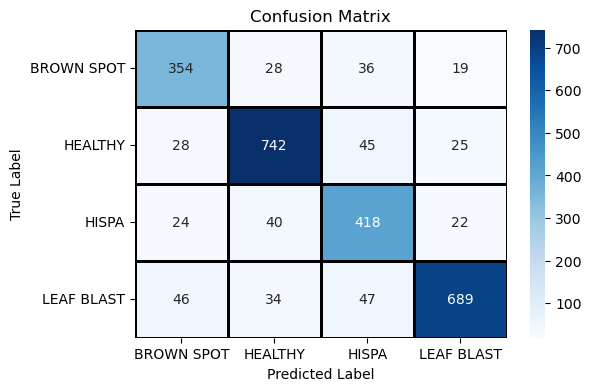

In [27]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,4))

sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=order, yticklabels=order,linewidths=1,linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
classifier.save("CNN.h5")


1/1 [==============================] - 0s 96ms/step
BROWN SPOT---->74.91630
HEALTHY---->4.43810
HISPA---->15.71788
LEAF BLAST---->4.92771


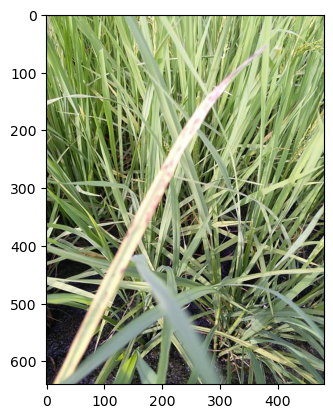

In [29]:
# need edit 



from numpy import loadtxt
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def load_image(filename):
    img = load_img(filename, target_size=(64, 64))
    img = img_to_array(img)
    img = img.reshape(1, 64, 64, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img
test_image = load_image("C:\\Users\\Mohini Tyagi\\Downloads\\paddy-disease-classification\\test_images\\BrownSpot\\100001.jpg")
img = mpimg.imread("C:\\Users\\Mohini Tyagi\\Downloads\\paddy-disease-classification\\test_images\\BrownSpot\\100001.jpg")
plt.imshow(img)
# load model
classifier = tf.keras.models.load_model('./CNN.h5')
classes = classifier.predict(test_image)[0]
order=['BROWN SPOT',"HEALTHY","HISPA" ,'LEAF BLAST']
for i in range(len(order)):
    print(order[i]+"---->%2.5f" % (classes[i]*100))